<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Electron/blob/main/Lab2_Thomson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2 Thomson tube experiments

Evgeny Kolonsky, Apr 2023

[P3.8.5.1](https://www.leybold-shop.com/physics/physics-experiments/electricity/free-charge-carriers-in-a-vacuum/thomson-tube/investigating-the-deflection-of-electrons-in-electrical-and-magnetic-fields/vp3-8-5-1.html) Investigating the deflection of electrons in electrical and magnetic fields

[P3.8.5.2](https://www.leybold-shop.com/physics/physics-experiments/electricity/free-charge-carriers-in-a-vacuum/thomson-tube/assembling-a-velocity-filter-wien-filter-to-determine-the-specific-electron-charge/vp3-8-5-2.html) Velocity filter (Wien filter)

Thomson tube [manual](https://www.ld-didactic.de/documents/en-US/GA/GA/5/555/555624e.pdf)


![Fig1](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig1%20Setup.png?raw=true)

In [1]:
import numpy as np # math functions
import scipy # scientific functions
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit  # non-linear curve fitting
from scipy.optimize import minimize
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd # handling data structures (loaded from files)
from sklearn.metrics import r2_score # import function that calculates R^2 score
from sklearn.metrics import mean_squared_error as mse
import json, requests
import itertools


## 1. Prinicples

In the Thomson tube all the electrons pass a slit aperture
behind the anode and tangentially hit a luminous screen with
a cm grid which is set up at an angle to the path of the light.,
Here the electron beam becomes visible and allows quantitative analysis. At the outlet of the slit aperture a plate capacitor
is mounted where the electron beam can be vertically deflected by an electrostatic field. In addition the electron beam
can be deflected in the magnetic field of a Helmholtz pair of
coils.

In the electric field an electron moves on a parabola-shaped
curve. If the electron is accelerated by a given anode voltage
$U_A$ and then passes through the electric field of a plate capacitor with the voltage $U_P$ and the distance between the
plates is $d$, the following applies for the path
$$ y = {E \over 4 U_A} x^2 \tag{1}$$.

On account of the construction of the tube, the electric field is
smaller then the value expected according to theory. This can
be taken into account in the experiment by a correction factor $k_1$: 
$$
E_{exp} = k_1 E_{theo}, \quad k_1 \approx 0.75.
\tag{2}
$$
Therefore
$$
\frac{y}{U_P} = k_1 {x^2 \over 4 d U_A},
\tag{2.1}
$$
Equation (2.1) can be used to determine exact value of $k_1$.

In the magnetic field of a Helmholtz pair of coils, at right angles to the axis of the beam an electron will move on a circular track with radius $r$:
$$
r^2  = {2 m U_a\over e B^2}.
\tag{3}
$$

The radius $r$ depends on the anode voltage $U_A$ and the magnetic field of the pair of coils.
$$
B = \mu_0 \left({4\over 5}\right)^{3/2} {N I\over R} = k_2 \mu_0 {N I\over R}, \quad k_2 \approx 0.7155.
\tag{4}
$$
with current $I$, number of windings $N$ and coil radius $R$. 

Again, $k_2$ can be thinked as a correction factor for the particular experiment setup and can be found by direct measurements of $B$ and $I$.

If the values for $x$ and $y$ are read off, in addition the specific charge can be estimated
$$
{e \over m} = {2U_A\over B r^2}.
\tag{5}
$$ 


## 2. Safety note

The Thomson tube is a thin-walled evacuated glass cylinder.
Danger of implosion!
- Do not expose the tube to any mechanical loads.
- Only connect the Thomson tube by means of safety connection leads.
- Observe the operating instructions for the Thomson tube
([555 624](https://www.leybold-shop.com/physics/physics-equipment/atomic-and-nuclear-physics/physics-of-the-electron/demonstation-tubes/electron-deflection-tube-555624.html)) and the tube stand ([555 600](https://www.leybold-shop.com/physics/physics-equipment/atomic-and-nuclear-physics/physics-of-the-electron/demonstation-tubes/tube-stand-555600.html)). 

## 3. Setup

![Fig2](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig2%20Setup.png?raw=true)

## 4. Carrying out the experiment

- Measure the distance d between the capacitor plates (5.5cm).
- Switch on the high voltage power supply. Now the cathode
is being heated.
- Slowly increase the anode voltage $U_A$ and observe the beam slowly increasing in brightness at the centre of the
luminous screen. 


**Getting (x,y) from photo:**

1. Correct distortions https://www2.lunapic.com/editor/?action=perspective 

<img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/perspective.png?raw=true" width=300> 

2. Digitalize points https://plotdigitizer.com/app

<img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/plotdigitizer.png?raw=true" width=300>


### 4.1 Deflection in an electric field
- While $U_A$ < 5 kV is kept at a fixed value slowly increase the
voltage at the capacitor plates $U_P$ and observe the change
to the beam.
- For different values of $U_A$ and $U_P$ read the value pairs $(x; y)$
for the track from the luminous screen. Then return the
voltage $U_P$ to zero.

### 4.2 Deflection in the magnetic field
- While $U_A$ < 5 kV is kept at a fixed value slowly increase the
current $I$ through the Helmholtz pair of coils and observe
the change to the beam.
- For different values of $U_A$ and $I$ read the value pairs $(x; y)$
from the luminous screen.

## 5. E-experiment

### 5.1 Reproduce vendor's experiment

#### What vendor writes in the experiment paper

If the voltage at the capacitor plates is increased, the electrons are deflected on a parabola-shaped track. The direction
of the deflection depends on the polarity of the applied voltage, the degree of the deflection on the applied voltage.
For $U_A$ = 4.0 kV and various values of $U_P$ value pairs $(x; y)$
were read off. The results are shown in the table below and in
fig. T4.


![Fig4](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig3%20E-sample.png?raw=true)

![Fig4-1](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig4%20E-Graph.png?raw=true)

#### Graph vendor's data

In [2]:
# Vendor's sample data
measurements ='''
1.0 0.0 0.0 0.0
2.0 0.0 0.1 0.1
3.0 0.2 0.2 0.3
4.0 0.3 0.4 0.6
5.0 0.5 0.6 0.9
6.0 0.6 0.9 1.3
7.0 0.8 1.2 1.8
8.0 1.1 1.6 2.3
9.0 1.4 2.0 NaN
'''  
data = np.genfromtxt(measurements.splitlines(), dtype=float)
x, y2, y3, y5 = data.T

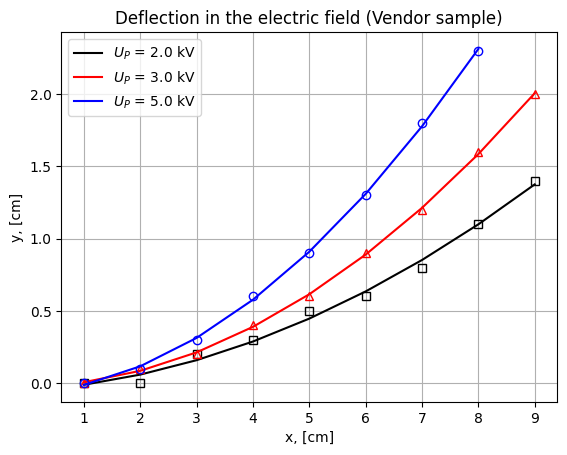

In [3]:
def fit_parabola(x,y):
  return np.poly1d(np.polyfit(x,y, 2))(x)

plt.plot(x, y2, color='black', marker='s', fillstyle='none', ls='')
plt.plot(x, fit_parabola(x,y2), color='black',
         label=r'$U_P$ = 2.0 kV')

plt.plot(x, y3, color='red', marker='^', fillstyle='none', ls='')
plt.plot(x, fit_parabola(x,y3), color='red',
         label=r'$U_P$ = 3.0 kV')

x = x[:-1]
y5 = y5[:-1]
plt.plot(x, y5, color='blue', marker='o', fillstyle='none', ls='')
plt.plot(x, fit_parabola(x,y5), color='blue',
         label=r'$U_P$ = 5.0 kV')

plt.legend()
plt.grid()
plt.xlabel('x, [cm]')
plt.ylabel('y, [cm]')
plt.title('Deflection in the electric field (Vendor sample)');

### 5.2 Perform E-experiment

$U_A$ = 2 kV

| $U_P$ =0 kV | $U_P$ =2 kV | $U_P$ =3 kV | $U_P$ =5 kV 
| :-:         | :-:         |  :-:        | :-: 
| <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/E/0-4.jpg?raw=true" width=200> | <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/E/2-4.jpg?raw=true" width=200> | <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/E/3-4.jpg?raw=true" width=200> |  <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/E/5-4.jpg?raw=true" width=200>

In [4]:
#  experiments data
measurements ='''
2	0	1 0
2	0	5 -0.1
2	0	9 -0.2
2	2	1 0
2	2	3 .2
2	2	4 .5
2	2	5 .7
2	2	6 1.1
2	2	7 1.5
2	2	8 1.8
2	2	9 2.3
2	3	1 0
2	3	2 .1
2	3	3 .4
2	3	4 .6
2	3	5 1.1
2	3	6 1.5
2	3	7 2.1
2 3 7.9 2.5
2	5	1 0
2	5	2 .2
2	5	3 .5
2	5	4 1.0
2	5	5 1.6
2	5	6 2.3
'''  
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, Up, x, y = data.T

Ua = Ua*1e3 #kV
Up = Up*1e3 #kV
x = x*1e-2 # cm
y = y*1e-2 # cm


#### Zero correction 

rotate axes by small angle $\alpha$

In [5]:
alpha = -0.23/9
x, y = x*np.cos(alpha) + y*np.sin(alpha), -x*np.sin(alpha) + y*np.cos(alpha) 

#### Qualitative check: graphs should be close to parabola form

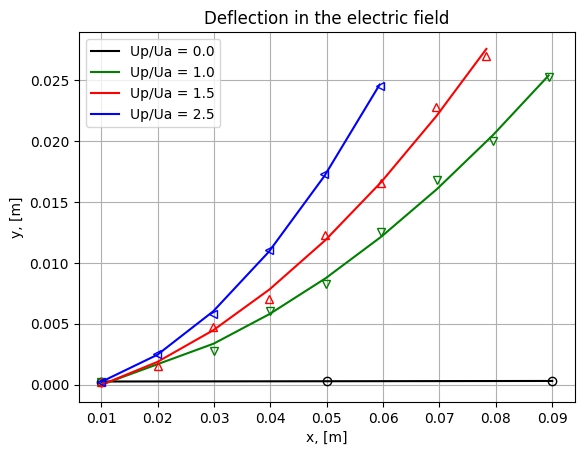

In [6]:
def fit_poly(x,y,degree=2):
  return np.poly1d(np.polyfit(x,y, degree))(x)

markers = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
colors = itertools.cycle(('black', 'green', 'red', 'blue'))

upa = Up/Ua
for option in np.unique(upa):
  ind = (upa==option)
  #if option == 0.0:
  #  degree = 2
  #else:
  #  degree = 2
  m = next(markers)
  c = next(colors)
  plt.plot(x[ind], y[ind], 
           marker=m,
           fillstyle='none', ls='', 
           color=c)
  plt.plot(x[ind], fit_poly(x[ind],y[ind], degree=2),
          label=f'Up/Ua = {option:.1f}',
           color=c)  
plt.legend()
plt.grid()
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.title('Deflection in the electric field');

#### Quantitative check: find exact value of $k_1$

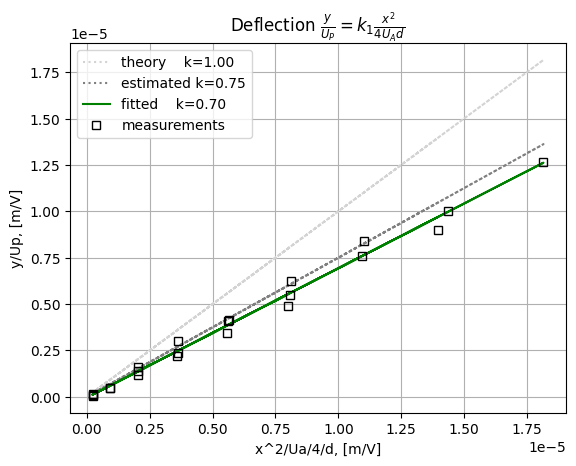

In [7]:
filter = Up > 0
d = 5.5e-2
x = x[filter]
y = y[filter]
Up = Up[filter]
Ua = Ua[filter]
 
xu = x*x/Ua/4/d
yu = y/Up


fit = linregress(xu, yu)
k1 = fit.slope

plt.plot(xu, 1.00*xu, label=f'theory    k={1.0:.2f}',c='lightgray', ls='dotted')
plt.plot(xu, 0.75*xu, label=f'estimated k={.75:.2f}',c='gray', ls='dotted')
plt.plot(xu, fit.intercept + fit.slope*xu, 
                      label=f'fitted    k={fit.slope:.2f}',c='green')
plt.plot(xu, yu, label='measurements', c='black', 
            marker='s', fillstyle='none', ls='', )
plt.legend()
plt.grid()
plt.xlabel('x^2/Ua/4/d, [m/V]')
plt.ylabel('y/Up, [m/V]')
plt.title(r'Deflection $\frac{y}{U_P} = k_1 \frac{x^2}{4 U_A d}$');

## 6. B-Experiment


### 6.1 Reproduce vendor's experiment

#### What vendor writes in the experiment paper

![Fig5](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig5%20B-Sample.png?raw=true)

![Fig6](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig6%20B-Graph.png?raw=true)

Curves of the shape $y = r - \sqrt{r^2 - (x-a)^2}$ were matched to the
measured values  and in addition
entered in fig. 5. The parameter corresponds to a shift along
the axis.

The curves correspond well to the measured values. The
parameter $a$ is approx. 0.8 cm. The magnetic field of the pair
of coils extends beyond the area of the plate capacitor; for
this reason the electron beam is deflected before it reaches
the mica plate.

If one uses the value pairs with equation (3) to calculate the applied magnetic field,
equation (5) can be used to estimate from
this the specific charge. The number of windings of the coils
is $N$ = 320, the average coil radius is $R$ = 6.7 cm. The results
for three value pairs are summarised in the table below.


![Fig7](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig7.png?raw=true)

This results in an average value for the specific charge of 

$$
{e\over m} = 2.1 \cdot 10^{11} {C \over \text{kg}}
$$
Literature value $
{e_0\over m_0} = 1.7588 \cdot 10^{11} {C \over \text{kg}}
$ 

#### Graph vendor's data

In [8]:
a = .8e-2 # parameter for y = r = sqrt(r^2 - (x-a)^2) equation
N = 320 # Helmholz ring coils
R = 6.7e-2 # Helmholz ring raduis
mu0 = scipy.constants.mu_0
k2 = .7125

In [9]:
# Vendor's sample data
measurements ='''
4 100 1 0
4 100 2 .1
4 100 3 .15
4 100 4 .2
4 100 5 .3
4 100 6 .5
4 100 7 .6
4 100 8 .8
4 100 9 .9
4 150 1 .0
4 150 2 .1
4 150 3 .2
4 150 4 .4
4 150 5 .5
4 150 6 .6
4 150 7 .9
4 150 8 1.1
4 150 9 1.4
4 260 1 .1
4 260 2 .2
4 260 3 .3
4 260 4 .5
4 260 5 .8
4 260 6 1.2
4 260 7 1.5
4 260 8 1.9
4 260 9 2.4
'''  
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, I, x, y = data.T

Ua = Ua*1e3 #kV
I = I*1e-3 #mA
x = x*1e-2 # cm
y = y*1e-2 # cm

r = y*0 # create and set to 0

B = k2*mu0 * N *I/R

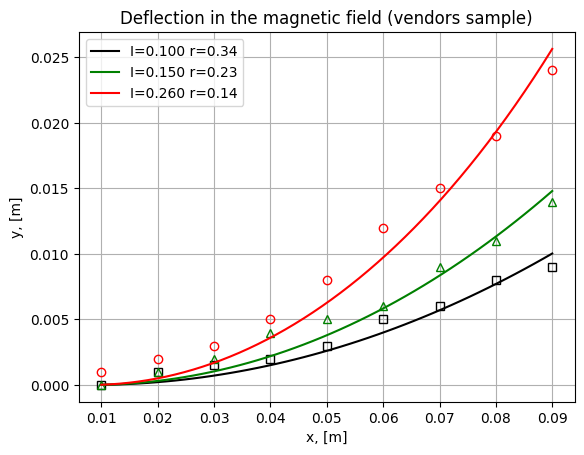

In [10]:
def circle(x, rd):
  return rd - np.sqrt(rd*rd - (x-a)*(x-a))
#def fit_r(x ,y ):
#  popt, _ = curve_fit(circle, x, y)
#  raduis = popt[0]
#  return radius

markers = itertools.cycle(('s', '^', 'o', '<', '>', 's', '8', 'p'))
colors = itertools.cycle(('black', 'green', 'red', 'blue'))
#rs = itertools.cycle((45.5e-2, 18.1e-2, 9.62e-2))

xdense = np.linspace(1e-2,9e-2,50)

for option in np.unique(I):
  ind = (I==option)
  m = next(markers)
  c = next(colors)
  plt.plot(x[ind], y[ind], 
           marker=m,
           fillstyle='none', ls='', 
           color=c)
  popt, _ = curve_fit(circle, x[ind], y[ind] )
  radius = popt[0]
  #radius = fit_r(x[ind], y[ind])
  r[ind] = radius
  #r = next(rs)
  plt.plot(xdense, circle(xdense,radius),
          label=f'I={option:.3f} r={radius:.2f}',
           color=c)  
plt.legend()
plt.grid()
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.title('Deflection in the magnetic field (vendors sample)');

In [12]:
em = 2*Ua/B/B/r/r
print(f'e/m value: {em.mean():.2e}')

e/m value: 3.48e+11


### 6.2 Perform B experiment

#### 6.2.1 Find $k_2$ value for the Helmolz rings 

$$ B = k_2 \mu_0 \frac{NI}{R}$$

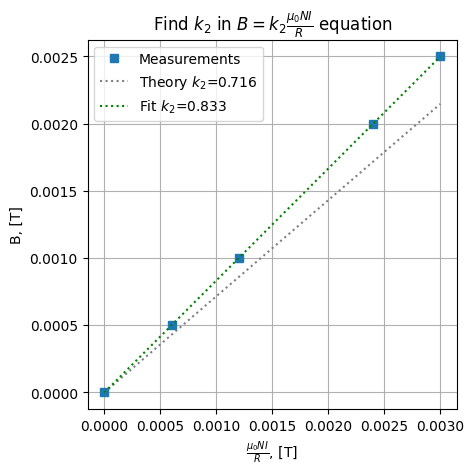

In [13]:
I = [0, .1, .2, .4, .5]
I = np.array(I)
B = [0,  .5, 1, 2, 2.5]
B = np.array(B) *1e-3 # mTesla

im = mu0*N*I/R

k_theor = .7155


plt.plot(im, B, marker='s', ls='', label = 'Measurements')
fit = linregress(im, B)
k2 = fit.slope
plt.plot(im, k_theor * im, ls='dotted', c='gray', 
         label=rf'Theory $k_2$={k_theor:.3f}')
plt.plot(im, fit.intercept + k2 *im, ls='dotted', c='green', 
         label=rf'Fit $k_2$={fit.slope:.3f}')
plt.xlabel(r'$\frac{\mu_0 N I}{R}$, [T]')
plt.ylabel('B, [T]')
plt.gca().set_box_aspect(1)
plt.grid()
plt.legend()
plt.title(r'Find $k_2$ in $B = k_2  \frac{\mu_0 N I}{R}$ equation');


#### 6.2.2 Collect data

$U_A$ = 4 kV

| $I$ =100 mA | $I$ =200 mA  
| :-:         | :-:          
| <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/B/U4-I1_zoomed.jpg?raw=true" width=200> | <img src="https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/B/U4-I2_zoomed.jpg?raw=true" width=200> 

In [14]:
# Magnetic field
# lab2 experiments data
measurements = '''
4 100 1.0  0.0
4 100 1.992307634071489  0.029227589732312875
4 100 3.015384731857022  0.12108537392961294
4 100 3.99230798619737  0.18789134792720263
4 100 5.046153843445185  0.27974951439062323
4 100 6.08461532096186  0.41336108011968165
4 100 7.023076921722593  0.572024838314571
4 100 8.023076745659651  0.7640917746413161
4 100 9.015384379731142  0.9394571219021328
4 200 1.9943071399578076  0.10174435896122258
4 200 3.0417454398009953  0.24999990019687868
4 200 4.043642943998827  0.42441863018219417
4 200 5.068310846019337  0.6511629392418561
4 200 6.070208350217168  0.9302324281633765
4 200 7.056925820832346  1.2616278953717304
4 200 8.0360529272075  1.636627745667048
4 200 8.73434524291919  1.9418604233382286
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, I, x, y = data.T

Ua = Ua*1e3 #kV
I = I*1e-3 #mA
x = x*1e-2 # cm
y = y*1e-2 # cm

#x, y = x*np.cos(alpha) + y*np.sin(alpha), -x*np.sin(alpha) + y*np.cos(alpha)

r = y*0 # create and set to 0

B = mu0 * k2 *N * I/R

#### 6.2.3. Plot and analyze



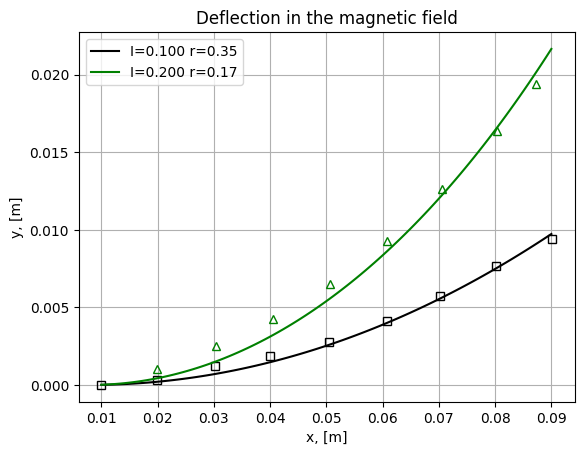

In [15]:
markers = itertools.cycle(('s', '^', 'o', '<', '>', 's', '8', 'p'))
colors = itertools.cycle(('black', 'green', 'red', 'blue'))


xdense = np.linspace(1e-2,9e-2,100)

for option in np.unique(I):
  ind = (I==option)
  m = next(markers)
  c = next(colors)
  plt.plot(x[ind], y[ind], 
           marker=m,
           fillstyle='none', ls='', 
           color=c)
  popt, _ = curve_fit(circle, x[ind], y[ind] )
  radius = popt[0]
  r[ind] = radius
  #r = next(rs)
  plt.plot(xdense, circle(xdense,radius),
          label=f'I={option:.3f} r={radius:.2f}',
           color=c)  
plt.legend()
plt.grid()
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.title('Deflection in the magnetic field');

In [16]:
em = 2*Ua/B/B/r/r
print(f'e/m value: {em.mean():.2e}')

e/m value: 2.75e+11


#### How close the electron velocity to speed of light $c$?

In [35]:
vx = np.sqrt(2*Ua*em)
print(f' v/c = {vx.mean()/scipy.constants.speed_of_light:.2f}')

 v/c = 0.13


## 7. Velocity filter (Wien experiment)

Assembling a velocity filter (Wien
filter) to determine the specific
electron charge.

Literature value
$$
{e \over m} = 
1.7588 \cdot 10^{11} {\text{C} \over \text{kg}}
$$


### 7.1 Reproduce vendor's experiment

#### What vendor writes in the experiment paper

In the experiment a velocity filter (Wien filter) is set up. For
the fixed anode voltage $U_A$ the voltage at the plate capacitor
$U_P$ and the current through the Helmholtz pair of coils $I$ is
selected in such a way that the deflections from the electric
and the magnetic fields just cancel each other out at the
outlet of the plate capacitor. If $U_A$ and therefore speed of the
electron is changed, it is apparent that this
compensation without a change of $U_P$ and $I$ is only possible at
a speed of $v=\sqrt{2 e U_A \over m}$ and that the electron beam is
deflected once again. Only by changing $U_P$ or $I$ can the
deflection be compensated for again.

In addition this setup allows more precise determination of
the specific electron charge. When $U_P$ and $I$ are chosen in
such a way that the electric and the magnetic field exactly
compensate the specific charge is
$$
{e \over m} = {2\over U_A} \left({E\over B}\right)^2
\tag{7.1}
$$

On account of the tube construction, the electric field is
smaller than the value to be expected theoretically. This can
be taken into account in the experiment by a correction factor:
$$
E_{exp} = 0.75 E_{theo} = 0.75 {U_P\over d}
\tag{7.2}$$

The magnetic field $B$ can be calculated using
$$
B = \mu_0 0.7155 {N I \over R}
\tag{7.3}
$$

![Fig8](https://github.com/evgeny-kolonsky/Lab2_Electron/blob/main/Fig8%20Wien.png?raw=true)

#### Reproduce vendor's sample

In [34]:
# sample data
measurements = '''
3 4 .38 
4 4 .33
5 4 .30
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, Up, I,  = data.T

Ua = Ua*1e3 #kV
Up = Up*1e3 #kV

E = 0.75 *Up/d
B = 0.7155 *mu0 * N *I /R
em = 1/2/Ua * (E/B)**2
print(f'e/m: {em.mean():.2e}')

e/m: 1.84e+11


### 7.2 Perform experiment

In [ ]:
# experiment data
measurements = '''
3 4 .38 
4 4 .33
5 4 .30
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ua, Up, I,  = data.T

Ua = Ua*1e3 #kV
Up = Up*1e3 #kV

E = 0.75 *Up/d
B = 0.7155 *mu0 * N *I /R
em = 1/2/Ua * (E/B)**2
print(f'e/m: {em.mean():.2e}')